###NOTE FROM PREVIOUS CLASS:
We last left samtools and bcftools when we ran these programs individually and a as pipeline. I hope you all recall that the 'pipeline' version was not printing all the mutations, it turns out you cannot pipe samtools sort and it needs to be saved as an intermediary files, in the example below: SARS.bam.sorted
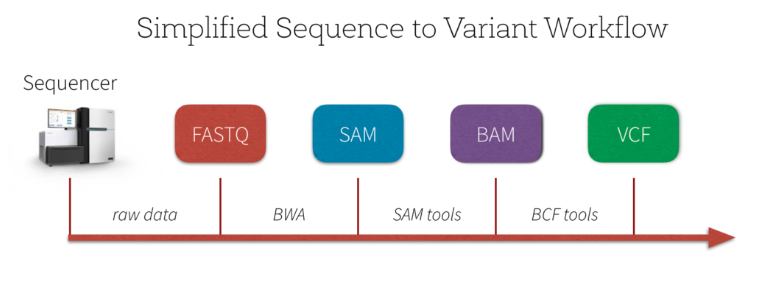

Now let's move on an continue with our work lesson

# Parsing variant files:

We will now install a new python library that will help us parse out VCF files.
It has more functionalities than what we will use if you want to learn more about it, follow this link https://brentp.github.io/cyvcf2/

In [1]:
!pip install cyvcf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.9 MB/s eta 0:00:00


In [2]:
## Download this file
!gdown 1-9y3LdsKDCPY-MXCE9L9EJhSXurPxRdj

Downloading...
From (original): https://drive.google.com/uc?id=1-9y3LdsKDCPY-MXCE9L9EJhSXurPxRdj
From (redirected): https://drive.google.com/uc?id=1-9y3LdsKDCPY-MXCE9L9EJhSXurPxRdj&confirm=t&uuid=b7215853-896c-4348-b7c2-97a871f71bed
To: /content/NG1125QALQ.mm2.sortdup.bqsr.hc.vcf.gz
100% 217M/217M [00:05<00:00, 40.4MB/s]


In [3]:
## Unzip the file
!gzip -df NG1125QALQ.mm2.sortdup.bqsr.hc.vcf.gz

Use the same piece of code that we used before to parse the VCF file. I really want to emphazise that we could (you could ) write a parser but someone already did the work so we just need to use their library (cyvcf https://brentp.github.io/cyvcf2/) to parse and explore our data.

As a simple exercise, look **modify** the code below and (look at the manual page) and extract the information for **DP** or "Depth of Sequence Coverage". Print the value in bewteen 'QUAL' and 'FILTER'

In [4]:
### As a quick excercise load the larger vcf files
import cyvcf2
vcf_reader = cyvcf2.VCF('NG1125QALQ.mm2.sortdup.bqsr.hc.vcf')

with open('human.tsv', 'w') as file:
    for variant in vcf_reader:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.INFO.get('DP')}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)



In [5]:
!more human.tsv

chr1	15903	rs557514207	G	GC	154.8699951171875	4	None	3
chr1	16495	rs3210724	G	C	348.7699890136719	42	None	1
chr1	17398	rs200784459	C	A	42.77000045776367	31	None	1
chr1	28563	rs4099234	A	G	31.739999771118164	2	None	3
chr1	28589	rs765092252	T	TTTGG	53.70000076293945	2	None	3
chr1	39255	rs11489803	A	C	421.7699890136719	10	None	3
chr1	39261	rs11489793	T	C	421.7699890136719	10	None	3
chr1	49298	rs10399793	T	C	112.7699966430664	23	None	1
chr1	49554	rs539322794	A	G	55.77000045776367	16	None	1
chr1	51802	rs1157805198	C	T	247.77000427246094	22	None	1
chr1	51803	rs62637812	T	C	249.77000427246094	22	None	1
chr1	52238	rs2691277	T	G	407.7699890136719	13	None	3
chr1	55131	rs3091275	A	G	94.7699966430664	18	None	1
chr1	55164	rs3091274	C	A	463.7699890136719	13	None	3
chr1	55545	rs28396308	C	T	94.7699966430664	19	None	1
chr1	55926	rs13343114	T	C	499.7699890136719	20	None	3
chr1	56381	rs4315454	T	C	149.77000427246094	14	None	1
chr1	57952	rs2691334	A	C	53.279998779296875	3	None	3
chr1	58211	rs2691335	A	G	

Import your table into a data frame, remember you added a new field, 'DP'.

HINTS:

 `columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'DP', 'FILTER', 'GENOTYPE']`




In [8]:
### show your work here.
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'DP', 'FILTER', 'GENOTYPE']

import pandas as pd
df = pd.read_csv('human.tsv' , sep = '\t' , header=None, names = columns)
df


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
0,chr1,15903,rs557514207,G,GC,154.869995,4,None,3
1,chr1,16495,rs3210724,G,C,348.769989,42,None,1
2,chr1,17398,rs200784459,C,A,42.770000,31,None,1
3,chr1,28563,rs4099234,A,G,31.740000,2,None,3
4,chr1,28589,rs765092252,T,TTTGG,53.700001,2,None,3
...,...,...,...,...,...,...,...,...,...
4804273,chrUn_JTFH01001998v1_decoy,1421,None,G,A,1655.770020,42,None,3
4804274,chrUn_JTFH01001998v1_decoy,1462,None,C,T,439.769989,51,None,1
4804275,chrUn_JTFH01001998v1_decoy,1546,None,T,C,966.770020,42,None,3
4804276,chrUn_JTFH01001998v1_decoy,1626,None,T,A,845.770020,28,None,3


In [12]:
df['CHROM'].value_counts()

chr2                          375979
chr1                          371191
chr4                          333191
chr3                          320741
chr6                          291399
                               ...  
chrUn_JTFH01001486v1_decoy         1
chrUn_JTFH01001487v1_decoy         1
chrUn_KN707863v1_decoy             1
chrUn_JTFH01000405v1_decoy         1
chrUn_JTFH01000633v1_decoy         1
Name: CHROM, Length: 1561, dtype: int64

In [14]:
df[df['CHROM'] == 'chr21']

,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
4440879,chr21,5014915,None,G,GGTCACGCTCATCCACACACCTGTGTGCTCATGCATGCACACACAG...,53.700001,1,None,3
4440880,chr21,5031125,rs1239803462,CT,C,325.140015,17,None,3
4440881,chr21,5049386,rs1195169566,C,G,58.279999,3,None,3
4440882,chr21,5097843,rs1452472116,A,G,226.779999,8,None,3
4440883,chr21,5097921,rs1245927817,C,T,342.769989,25,None,1
...,...,...,...,...,...,...,...,...,...
4519360,chr21,46692843,rs4040282,C,T,86.769997,15,None,1
4519361,chr21,46694171,rs201322600,C,A,49.740002,2,None,3
4519362,chr21,46694324,rs201092756,A,C,136.770004,5,None,1
4519363,chr21,46694325,rs202171310,C,A,136.770004,5,None,1


#Quick detour on Regex

Imagine regular expressions as a special language for finding patterns in text.Complex patterns.

Here's a simple breakdown:

**Basic Characters:** Regular expressions start with the basics. If you search for `cat` in regex, it will find exactly that string: `cat`.

**Special Characters**: Regex also has special characters that add flexibility. For instance, the dot `.` can stand for any character. So, `c.t` would match `cat`, `cbt`", `c2t`, and so on.

**Repeating Patterns: ** You can also search for repeating patterns. For example, c*t can match "ct" (with zero "c"), "cat" (with one "c"), "ccct" (with three "c"), and so forth.

**Character Sets:** You can specify a set of characters to match. For instance, `[cb]at` will match either "`cat`" or "`bat`".

**Ranges:** Regex allows you to search for ranges. If you write 1-5, it will match any number from 1 to 5.

**Escaping Special Characters:** If you need to search for a special character itself (like .), you can "escape" it with a backslash `\.` So, `\.` would search for a literal period.

**Beginning and End:** You can specify if you want your pattern to be at the beginning of a line `(^)` or at the end (`$`).

**Repeating patterns:** If you want an expression to be matched m times `{m}`, m or n times `{m,n}`

In essence, think of regex as a puzzle where you define the rules for what pieces (characters) you're looking for and how they can be arranged. This makes regex a powerful tool for text processing, data validation, and more.

https://www.dataquest.io/blog/regex-cheatsheet/

Using regex subset the df to positions within canonical chromosomes only chr1, chr2, etc.

In [48]:
#### enter your regex below, feel free to try and edit
df_filtered = df[df['CHROM'].str.match(r'^chr\w{1,2}$')]
df_filtered


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
0,chr1,15903,rs557514207,G,GC,154.869995,4,None,3
1,chr1,16495,rs3210724,G,C,348.769989,42,None,1
2,chr1,17398,rs200784459,C,A,42.770000,31,None,1
3,chr1,28563,rs4099234,A,G,31.740000,2,None,3
4,chr1,28589,rs765092252,T,TTTGG,53.700001,2,None,3
...,...,...,...,...,...,...,...,...,...
4716233,chrM,16183,rs28671493,A,"C,ACCC",29074.730469,790,None,1
4716234,chrM,16189,rs28693675,T,C,33374.769531,788,None,3
4716235,chrM,16217,rs35134837,T,C,29254.769531,874,None,3
4716236,chrM,16295,rs878874012,C,T,42662.769531,1223,None,3


In [47]:
### How many variants have been identified per chr

df_filtered ['CHROM'].value_counts()

chr20    1
Name: CHROM, dtype: int64

You cannot know everything, take a few minutes to look for help on the pandas function called .isin() EDIT This box to add a link to where you found help.


In [29]:
### Use your newly found knowlegde to create a new dataframe with the following positions only.
### https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
ids = ['rs4410790','rs2470893', 'rs2223841', 'rs201571', 'rs2223841', 'rs6036025', 'rs6152']
df_filtered1 = df_filtered[df_filtered['ID'].isin(ids)]
df_filtered1

,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
4367112,chr20,22032876,rs201571,C,T,634.77002,42,None,1


Great Job!

Now, subset the data frame to only chromosomes M, Y, X. (remember to use REGEX).

Call this dataframe `df_sex_and_maternal`.

HINT: `df[df['CHROM'].str.match(r'REGEXPATTERN')]`

In [ ]:
#### Show your work here

df_sex_and_maternal= df[df['CHROM'].str.match(r'^chr\D$')]
df_sex_and_maternal

Create another data frame to include only Canonical chromomosmes (1-22,X,Y,M)

Call this `df_canonical`. Remember to use REGEX


In [31]:
df_canonical = df[df['CHROM'].str.match(r'^chr[0-9XYM]{1,2}$')]
df_canonical

,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
0,chr1,15903,rs557514207,G,GC,154.869995,4,None,3
1,chr1,16495,rs3210724,G,C,348.769989,42,None,1
2,chr1,17398,rs200784459,C,A,42.770000,31,None,1
3,chr1,28563,rs4099234,A,G,31.740000,2,None,3
4,chr1,28589,rs765092252,T,TTTGG,53.700001,2,None,3
...,...,...,...,...,...,...,...,...,...
4716233,chrM,16183,rs28671493,A,"C,ACCC",29074.730469,790,None,1
4716234,chrM,16189,rs28693675,T,C,33374.769531,788,None,3
4716235,chrM,16217,rs35134837,T,C,29254.769531,874,None,3
4716236,chrM,16295,rs878874012,C,T,42662.769531,1223,None,3


#### REGEX cheat sheet

https://www.dataquest.io/blog/regex-cheatsheet/

As a simple exercise, caculate the mean coverage per chromosome and save the result as `coverage`

In [36]:
#### Show your work here
### Cheat sheet: .groupby()   .mean()

coverage = df_canonical.groupby('CHROM')['DP'].mean()
coverage


CHROM
chr1       36.330946
chr10      36.837499
chr11      36.085682
chr12      36.417210
chr13      36.293064
chr14      36.456806
chr15      37.514518
chr16      44.125355
chr17      38.212742
chr18      36.514588
chr19      37.736897
chr2       37.236433
chr20      44.298851
chr21      50.774278
chr22      41.997717
chr3       36.694769
chr4       36.505182
chr5       36.374345
chr6       36.014375
chr7       36.390706
chr8       36.467156
chr9       36.544628
chrM     1942.463415
chrX       18.737380
chrY       65.752124
Name: DP, dtype: float64

As another simple exercise, count the number of unique genotype values per chromosome. Save the result as `genotype_counts`

HINT: `.value_counts().unstack()`

In [35]:
#### Show your work here

genotype_counts = df_canonical.groupby('CHROM')['GENOTYPE'].value_counts()
genotype_counts

CHROM  GENOTYPE
chr1   1           209010
       3           162157
       2               24
chr10  1           141472
       3            95009
                    ...  
chrX   1             6850
       2               57
chrY   1             7441
       3             2556
       2                8
Name: GENOTYPE, Length: 74, dtype: int64

As another excercise create a new data frame, called it `chr3`, it will only include the variants identified in chromosome3.

HINT: contidion to be met is `df['CHROM'] == 'chr3'`

In [34]:
#### Show your work here
chr3_df = df_canonical[df['CHROM'] == 'chr3']
chr3_df

<ipython-input-34-48062bf2d7eb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chr3_df = df_canonical[df['CHROM'] == 'chr3']


,CHROM,POS,ID,REF,ALT,QUAL,DP,FILTER,GENOTYPE
747170,chr3,11859,rs1382816570,C,G,426.769989,29,None,1
747171,chr3,11919,rs1407981181,C,A,1221.770020,28,None,3
747172,chr3,11929,rs1238540810,A,C,1356.770020,29,None,3
747173,chr3,11930,rs1233591084,ACTGT,A,1312.729980,30,None,3
747174,chr3,11956,rs1271483947,T,C,1168.770020,26,None,3
...,...,...,...,...,...,...,...,...,...
1067906,chr3,198181744,rs75303390,A,G,40.770000,21,None,1
1067907,chr3,198189310,None,GT,G,252.729996,9,None,3
1067908,chr3,198191228,rs199996258,C,G,44.770000,11,None,1
1067909,chr3,198220183,rs766917987,T,TGA,143.000000,5,None,3


Simple exercise: From chromosome 3, find all the variants that correspond to changes from A -> C and have a coverage larger than 20X.

In [ ]:
### Show your work here



FIND the most common mutation.
As a more complex excercise, now write a loop to go over all possible permutations (A->T, A->C, A->G, T->A, there are 12 total). save the result as a dataframe (`df_mutations`).

HINT: `results_df = results_df.append({col: val, col: val, col: val}, ignore_index=True)`

HINT: `df_mutations = pandas.DataFrame(columns=['REF', 'ALT', 'COUNTS'])`

HINT: `.isin()`

HINT: `its & not and`

In [63]:
####mShow your work here!

#### Solve  it for one combination only say (A -> T first)

#### Then save it on the go on a data frame (see hint above)
pur = ['A' , 'G']
pyr = ['C' , 'T']

def mutations(a,b):
  df=df_filtered[df_filtered['REF'].isin(a) & df_filtered['ALT'].isin(b)]
  return len(df)
print(mutations(pur,pyr))
print(mutations(pur,pur))
print(mutations(pyr,pur))
print(mutations(pyr,pyr))
ratio = ((mutations(pur,pur)) + (mutations(pyr,pyr))) / ((mutations(pur,pyr)) + (mutations(pyr,pur)))
ratio
#transition1 = df_filtered[df_filtered['REF'].isin(pur) & df_filtered['ALT'].isin(pyr)] #or df_filtered[df_filtered['REF'].isin(pyr) & df_filtered['ALT'].isin(pyr)]
#transition1

#transition2 = df_filtered[df_filtered['REF'].isin(pyr) & df_filtered['ALT'].isin(pyr)] #or df_filtered[df_filtered['REF'].isin(pyr) & df_filtered['ALT'].isin(pyr)]
#transition2

637216
1264896
637233
1268392


1.9877515695018004

In [ ]:
df_mutations

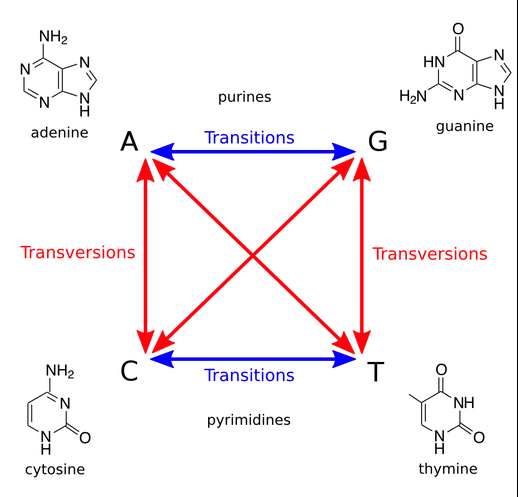

From the internets" The transition/transversion (Ts/Tv) ratio is a commonly used quality control (QC) metric in genome sequencing to assess the accuracy of variant calls, particularly in the context of single nucleotide polymorphism (SNP) analysis. This ratio provides information about the types of substitutions that occur in the sequenced DNA, which can be indicative of sequencing errors or biological differences."


In [ ]:
### As a final execercise calculate the ratio of transition/transversion ration:
### USE what you learned today!


# Creating simple plots

Make some plots HINT: `import matplotlib.pyplot as plt`

`plt.scatter(x,y)`

`plt.xlabel`

`plt.title`

`plt.xlim`

DP and QUAL are supposed to be related, like a higher quality with corresponds to higher read depth, make a scatter plot with these two values, use chr3 since you already have it subsetted. (But feel free to use any)

In [ ]:
### Show your work here
import matplotlib.pyplot as plt


In [ ]:
### Also here, it is good practice if we keep the plot on its own box

quality = chr3_df['QUAL']
coverage = chr3_df['DP']

plt.scatter(quality, coverage)
plt.xlabel('Variant Call Quality')

**HINT/TIP**, many pandas objects like dataseries (in our example things like coverage, genotypes, etc...) have a built-in plotting functionality that leverages Matplotlib under the hood.

When you call plot() on a Pandas Series or DataFrame, it provides a convenient interface to create various types of plots, including bar plots, line plots, scatter plots, and more.

`kind = 'pie|bar'`
stacked, lengend take booleans

In [ ]:
### Plot the number of genotypes per chromosomes as a barplot
results =chr3_df['GENOTYPE'].value_counts()
results.plot(kind = 'pie')

As a final excercise, let's plot as a pie chart the genotypes at chromosome 3.

In [ ]:
### Show your work here!
